Index(['Restaurent Name', 'Review', 'Ratings', 'Platform', 'collcted  by',
       'Cuisine', 'Positive', 'Negative', 'Neutral', 'Composite'],
      dtype='object')


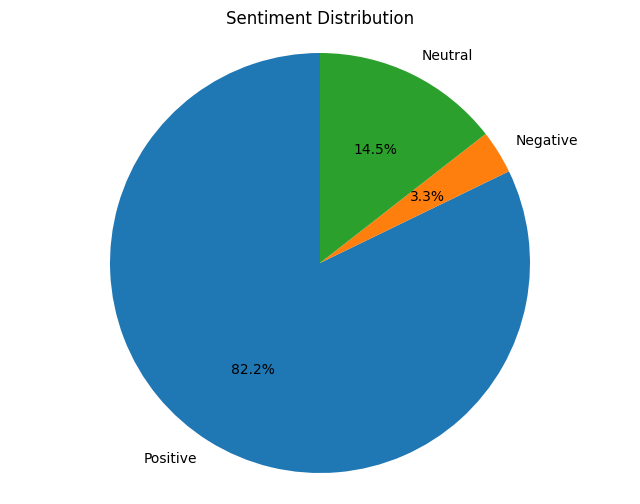

The pie chart shows the overall distribution of sentiments across all reviews.
It visually represents the proportion of positive, negative, and neutral sentiments.
Cuisine with highest positive proportion: South Indian
Cuisine with highest negative proportion: Chinese
Cuisine with highest neutral proportion: Dessert


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('/content/sentiment_analysis_output.csv')

# Print the column names to verify their actual names
print(df.columns)

# Replace with actual column names from the output above
# Carefully examine the output of df.columns and replace with the exact names
positive_column = 'Positive'  # Example: Replace 'positive' with 'Positive' if that's the actual column name
negative_column = 'Negative' # Example: Replace 'negative' with 'Negative' if that's the actual column name
neutral_column = 'Neutral'   # Example: Replace 'neutral' with 'Neutral' if that's the actual column name


# Assuming columns are named 'positive', 'negative', 'neutral', 'composite'
positive_count = df[positive_column].sum()
negative_count = df[negative_column].sum()
neutral_count = df[neutral_column].sum()

# Labels for the pie chart
labels = ['Positive', 'Negative', 'Neutral']

# Sizes corresponding to each sentiment
sizes = [positive_count, negative_count, neutral_count]

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Explanation for the pie chart:
print("The pie chart shows the overall distribution of sentiments across all reviews.")
print("It visually represents the proportion of positive, negative, and neutral sentiments.")


# 1. Group by cuisine and sum sentiment scores
# Use the correct column names here: positive_column, negative_column, neutral_column
cuisine_sentiment = df.groupby('Cuisine')[[positive_column, negative_column, neutral_column]].sum().reset_index()

# 2. Calculate the total reviews for each cuisine
cuisine_sentiment['total_reviews'] = cuisine_sentiment[[positive_column, negative_column, neutral_column]].sum(axis=1)

# 3. Calculate the proportion of each sentiment for each cuisine
# Iterate using the correct column names
for sentiment in [positive_column, negative_column, neutral_column]:
    cuisine_sentiment[sentiment + '_proportion'] = cuisine_sentiment[sentiment] / cuisine_sentiment['total_reviews']

# 4. Find the cuisine with the highest proportion of each sentiment
highest_positive = cuisine_sentiment.loc[cuisine_sentiment[positive_column + '_proportion'].idxmax(), 'Cuisine']
highest_negative = cuisine_sentiment.loc[cuisine_sentiment[negative_column + '_proportion'].idxmax(), 'Cuisine']
highest_neutral = cuisine_sentiment.loc[cuisine_sentiment[neutral_column + '_proportion'].idxmax(), 'Cuisine']

# Print the results
print(f"Cuisine with highest positive proportion: {highest_positive}")
print(f"Cuisine with highest negative proportion: {highest_negative}")
print(f"Cuisine with highest neutral proportion: {highest_neutral}")



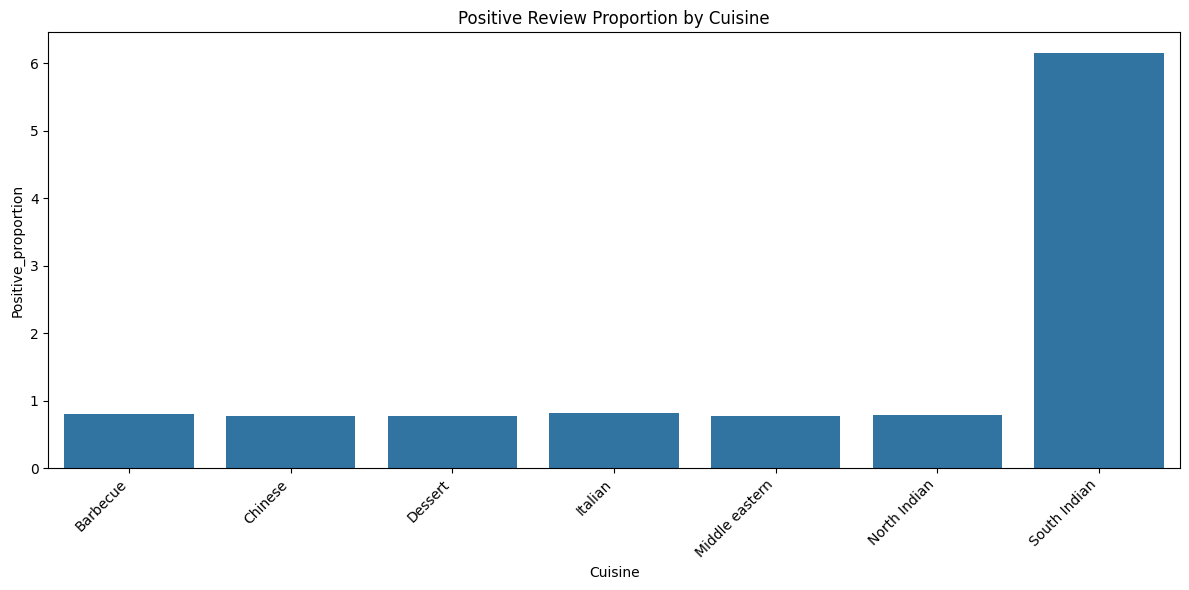

This bar plot shows the proportion of positive reviews for each cuisine.
It helps to compare the positivity levels across different cuisines.


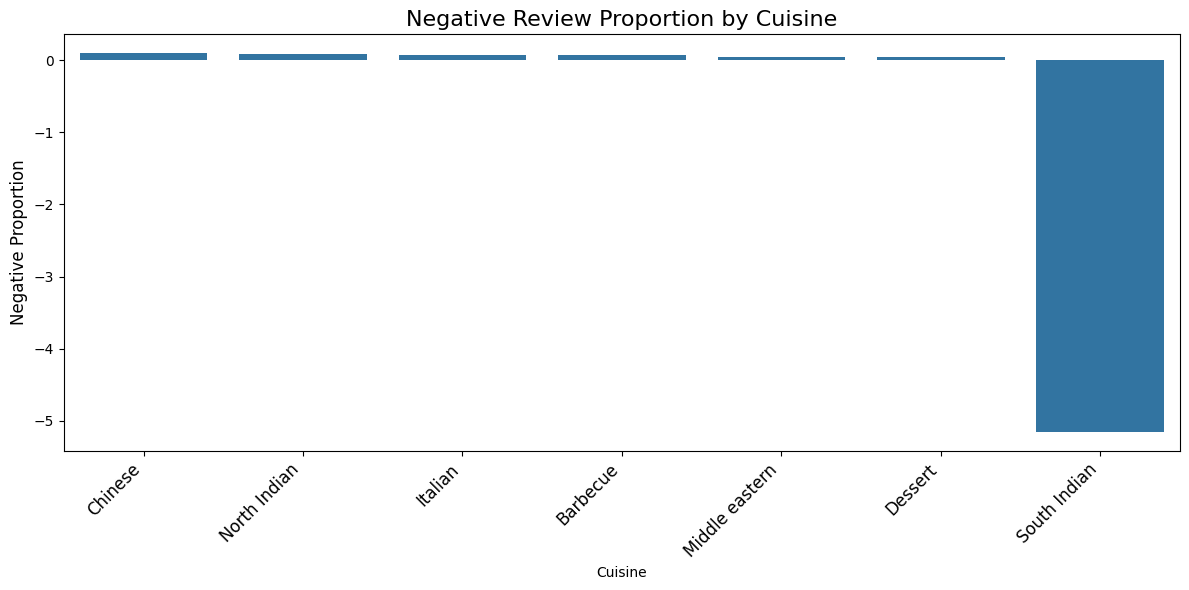

This bar plot shows the proportion of negative reviews for each cuisine.
It helps to compare the negativity levels across different cuisines, sorted in descending order.
The cuisine with the highest negative proportion appears first.




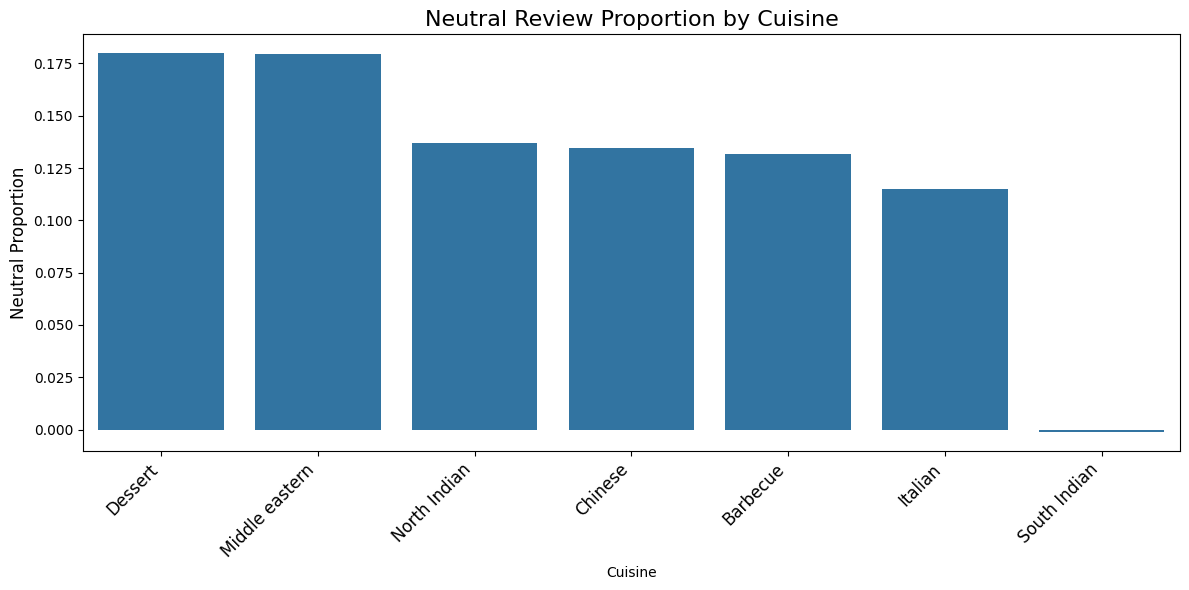

This bar plot shows the proportion of neutral reviews for each cuisine.
It helps to compare the neutrality levels across different cuisines, sorted in descending order.
The cuisine with the highest neutral proportion appears first.


In [ ]:
# 5. Visualizations
# a. Bar plot for positive proportions
plt.figure(figsize=(12, 6))
sns.barplot(x='Cuisine', y=positive_column + '_proportion', data=cuisine_sentiment) # Use correct column name
plt.title('Positive Review Proportion by Cuisine')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Explanation for the positive proportions bar plot:
print("This bar plot shows the proportion of positive reviews for each cuisine.")
print("It helps to compare the positivity levels across different cuisines.")

## b. Bar plot for negative proportions
plt.figure(figsize=(12, 6))
sns.barplot(x='Cuisine', y=negative_column + '_proportion', data=cuisine_sentiment,  # Changed line
            order=cuisine_sentiment.sort_values(negative_column + '_proportion', ascending=False).Cuisine)  # Changed line
plt.title('Negative Review Proportion by Cuisine', fontsize=16)  # Increase title fontsize
plt.xticks(rotation=45, ha='right', fontsize=12)  # Increase x-axis label fontsize
plt.ylabel('Negative Proportion', fontsize=12)  # Add y-axis label
plt.tight_layout()
plt.show()

# Explanation for the negative proportions bar plot:
print("This bar plot shows the proportion of negative reviews for each cuisine.")
print("It helps to compare the negativity levels across different cuisines, sorted in descending order.")
print("The cuisine with the highest negative proportion appears first.")
print("\n")  # Add a newline for better readability


# c. Bar plot for neutral proportions
plt.figure(figsize=(12, 6))
sns.barplot(x='Cuisine', y=neutral_column + '_proportion', data=cuisine_sentiment,  # Changed line
            order=cuisine_sentiment.sort_values(neutral_column + '_proportion', ascending=False).Cuisine)  # Changed line
plt.title('Neutral Review Proportion by Cuisine', fontsize=16)  # Increase title fontsize
plt.xticks(rotation=45, ha='right', fontsize=12)  # Increase x-axis label fontsize
plt.ylabel('Neutral Proportion', fontsize=12)  # Add y-axis label
plt.tight_layout()
plt.show()

# Explanation for the neutral proportions bar plot:
print("This bar plot shows the proportion of neutral reviews for each cuisine.")
print("It helps to compare the neutrality levels across different cuisines, sorted in descending order.")
print("The cuisine with the highest neutral proportion appears first.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


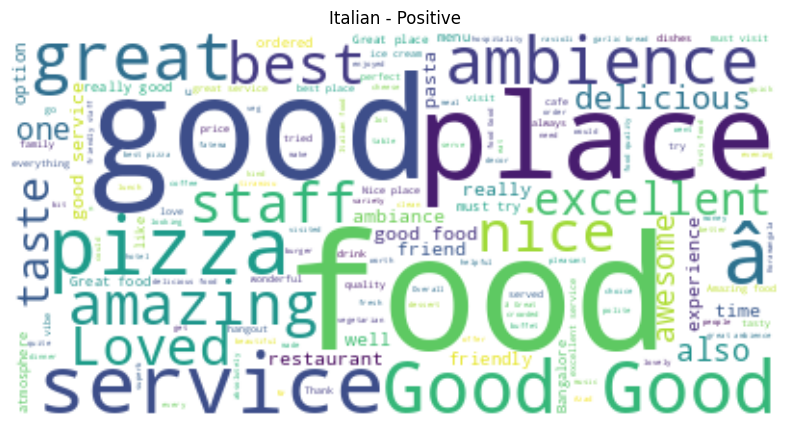

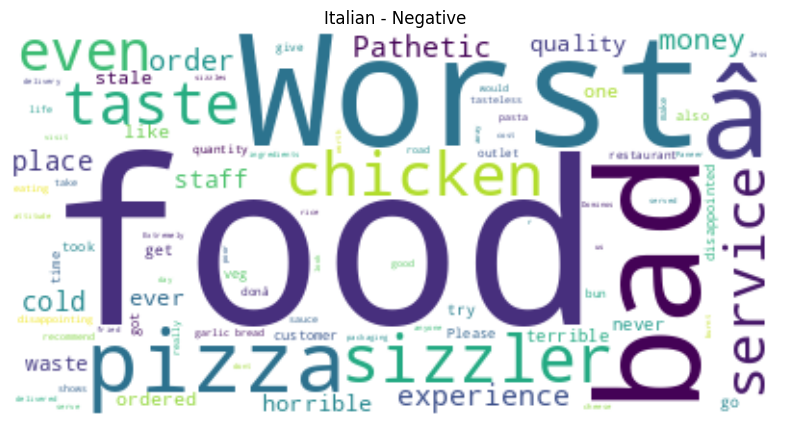

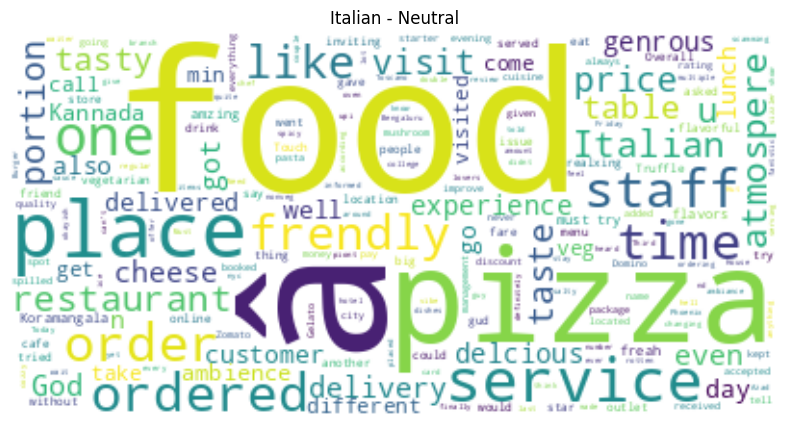

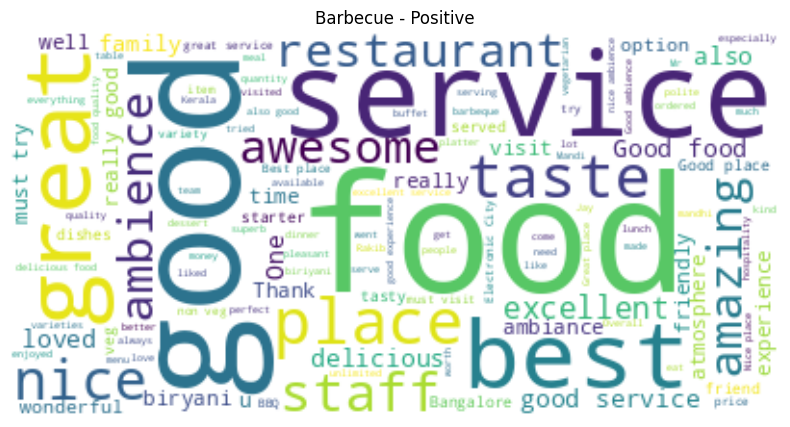

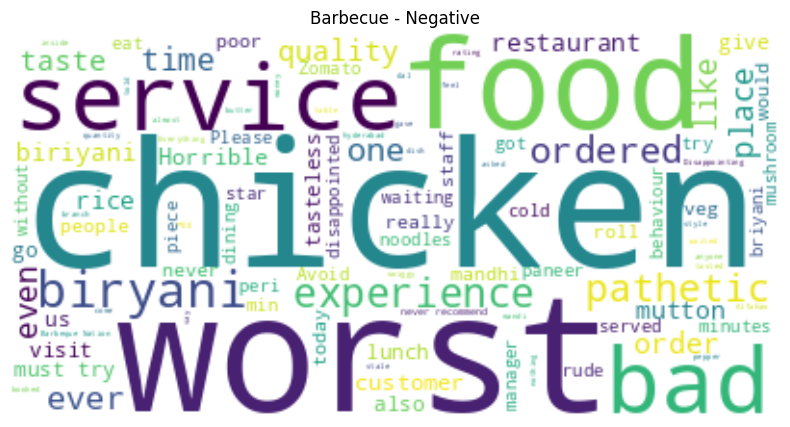

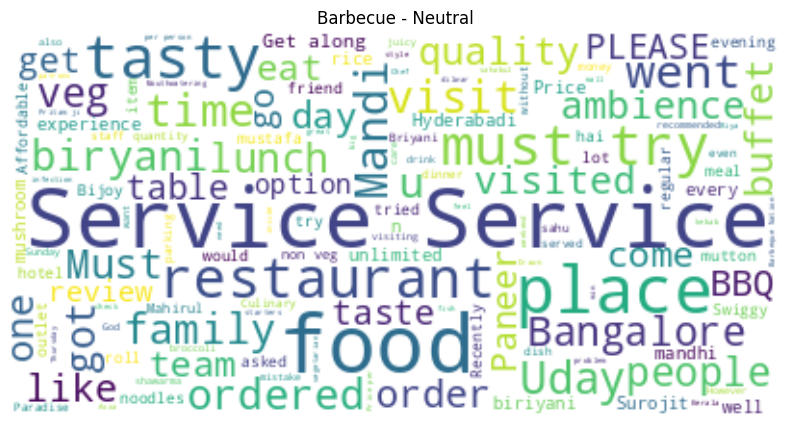

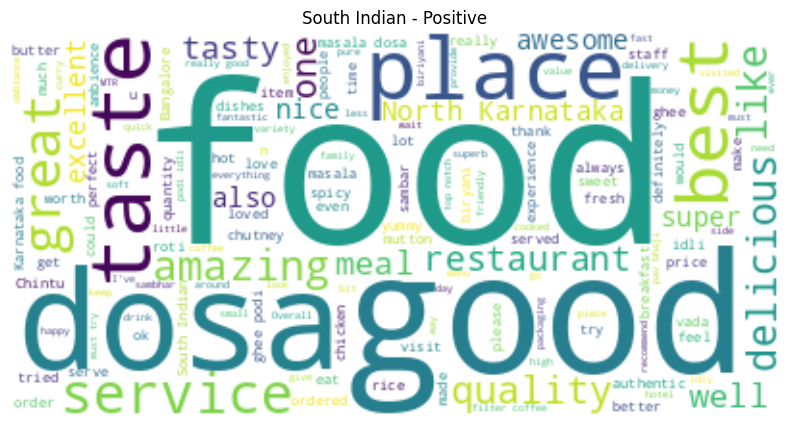

No data available for South Indian - Negative
No data available for South Indian - Neutral


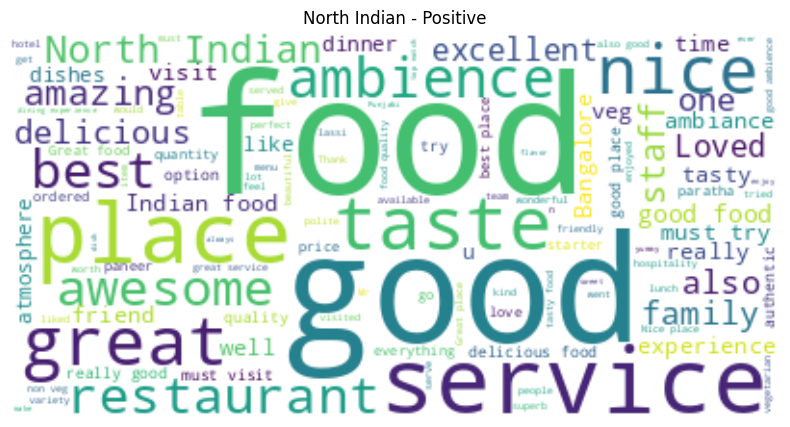

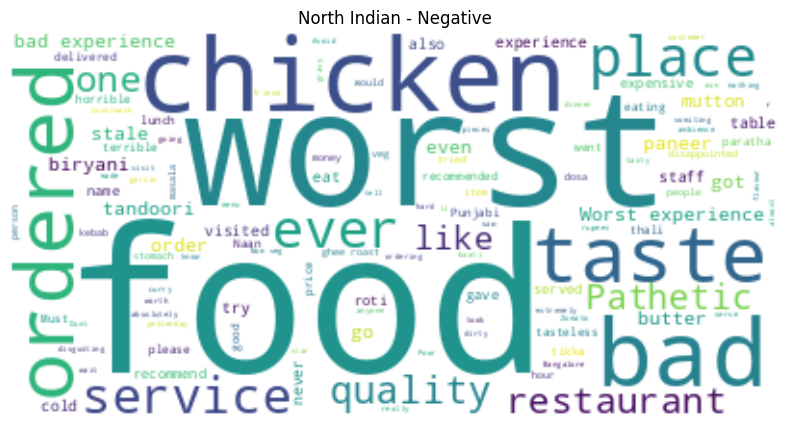

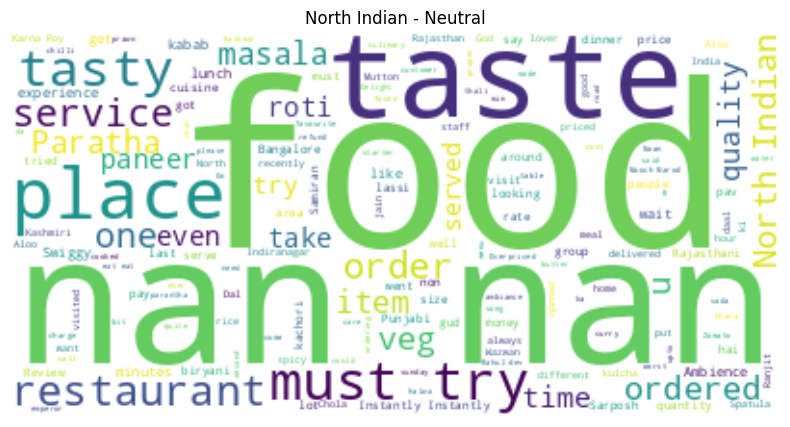

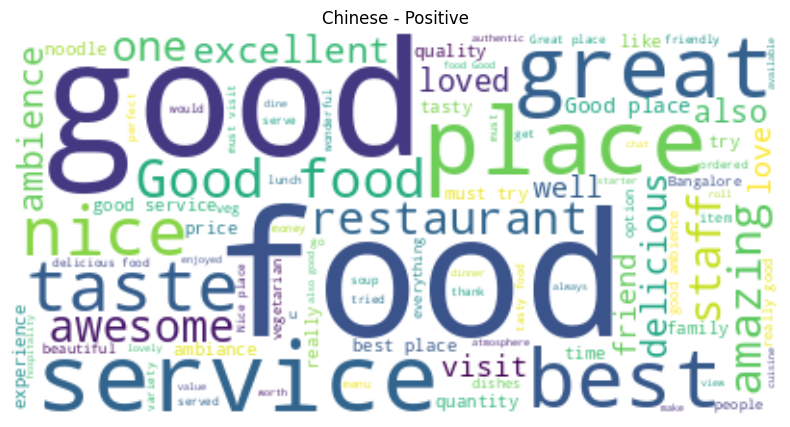

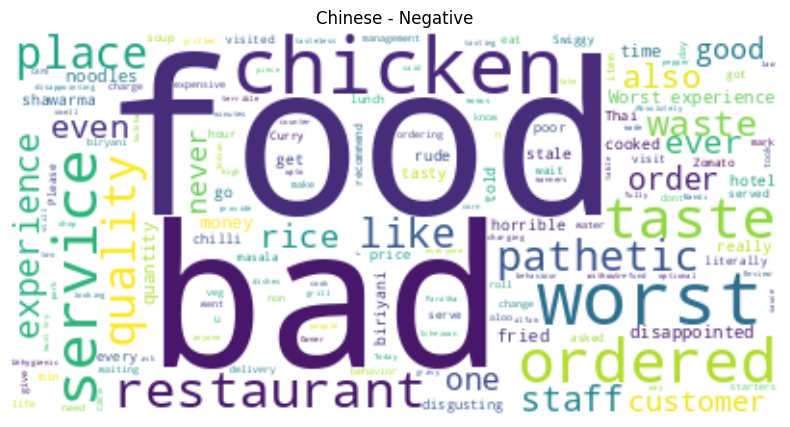

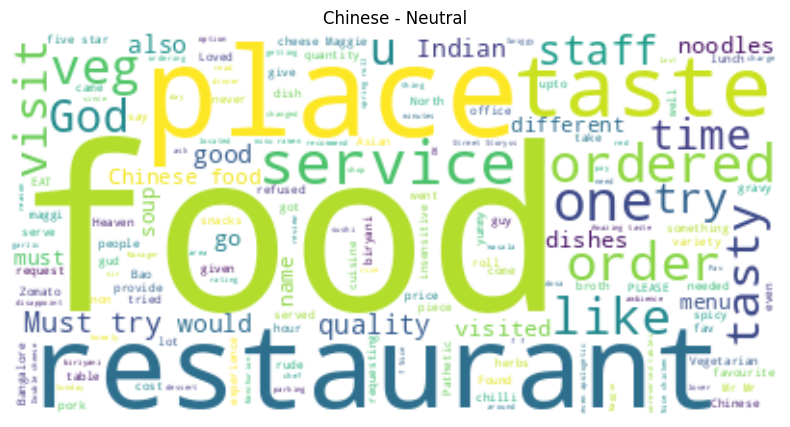

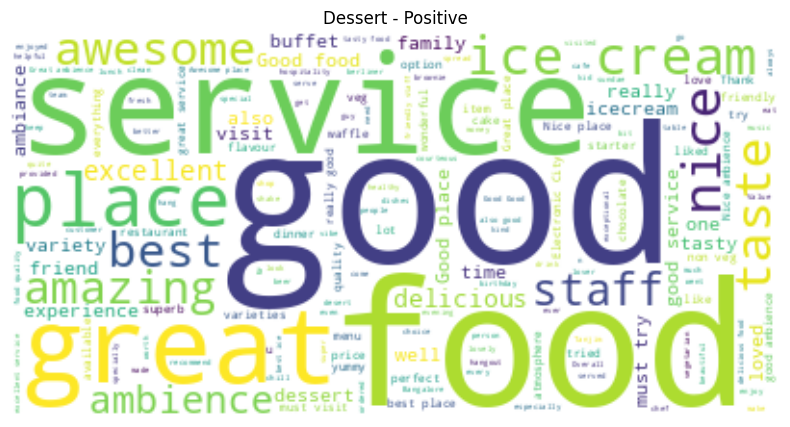

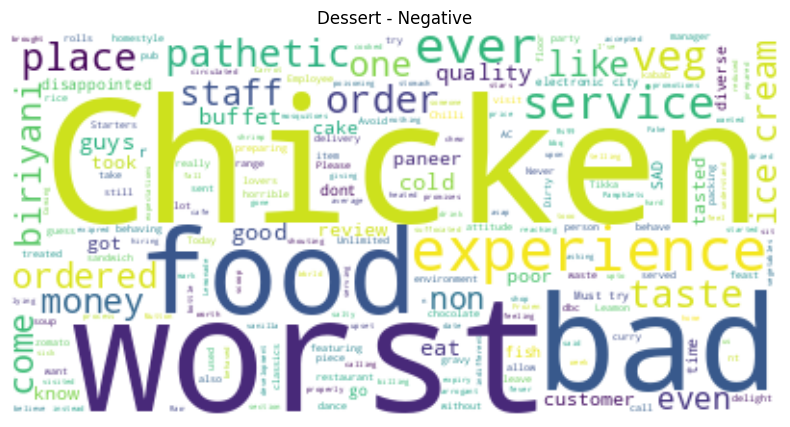

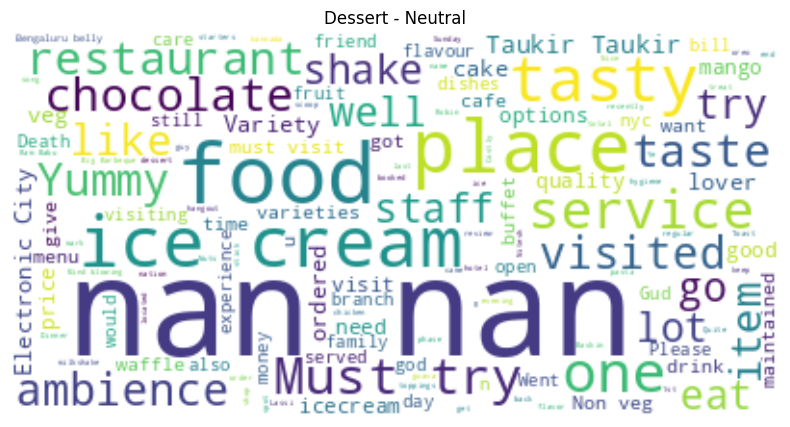

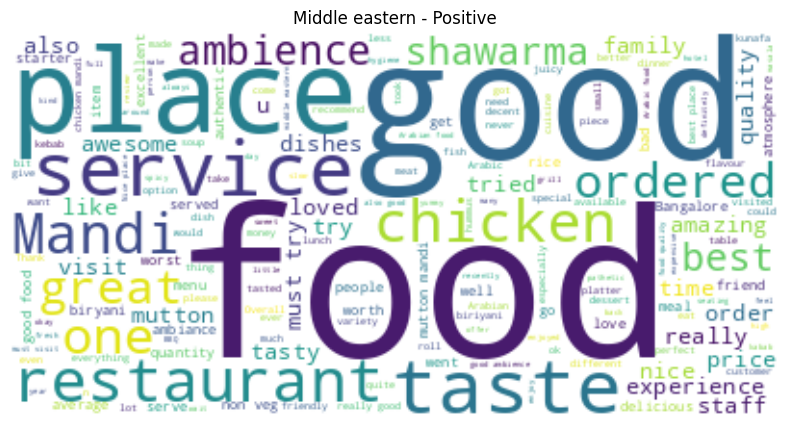

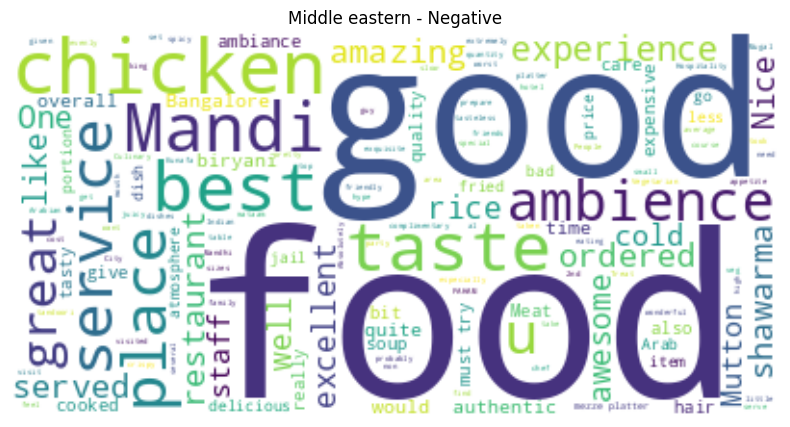

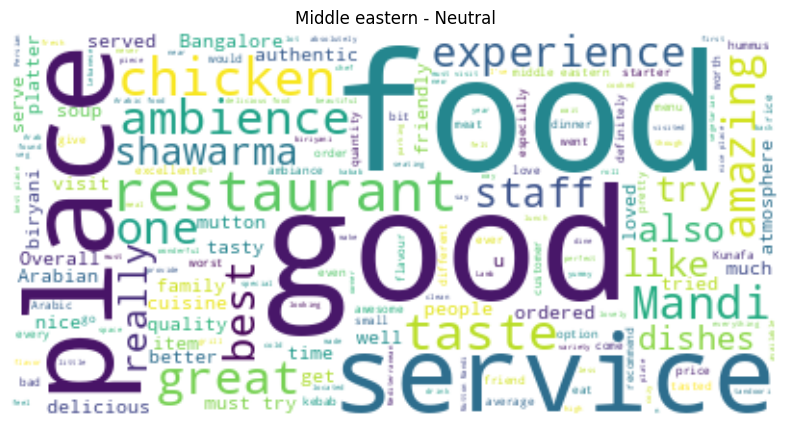

No data available for nan - Positive
No data available for nan - Negative
No data available for nan - Neutral


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

# Download NLTK packages
nltk.download('punkt')
nltk.download('stopwords')

# Function to generate word cloud
def generate_wordcloud(text, title):
    if not text.strip():  # Skip if the text is empty
        print(f"No data available for {title}")
        return
    stop_words = set(stopwords.words('english'))
    wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Generating word clouds for each cuisine and sentiment
for cuisine in df['Cuisine'].unique():
    for sentiment, sentiment_column in [('Positive', 'Positive'), ('Negative', 'Negative'), ('Neutral', 'Neutral')]:
        text = " ".join(df[(df['Cuisine'] == cuisine) & (df[sentiment_column] > 0.5)]['Review'].astype(str).tolist())
        generate_wordcloud(text, f"{cuisine} - {sentiment}")


In [ ]:
# Cuisine Comparison: Sentiment Differences
# Sort by positive proportion and compare negative proportions
cuisine_sentiment_sorted = cuisine_sentiment.sort_values(positive_column + '_proportion', ascending=False)
top_cuisine = cuisine_sentiment_sorted.iloc[0]['Cuisine']
bottom_cuisine = cuisine_sentiment_sorted.iloc[-1]['Cuisine']

print(f"Top cuisine by positive proportion: {top_cuisine}, Negative proportion: {cuisine_sentiment_sorted.iloc[0][negative_column + '_proportion']}")
print(f"Bottom cuisine by positive proportion: {bottom_cuisine}, Negative proportion: {cuisine_sentiment_sorted.iloc[-1][negative_column + '_proportion']}")

# Customer Satisfaction by Cuisine: Composite Sentiment
cuisine_sentiment['composite_sentiment'] = cuisine_sentiment[positive_column + '_proportion'] - cuisine_sentiment[negative_column + '_proportion']
highest_satisfaction_cuisine = cuisine_sentiment.loc[cuisine_sentiment['composite_sentiment'].idxmax(), 'Cuisine']
print(f"\nCuisine with highest composite sentiment (customer satisfaction): {highest_satisfaction_cuisine}")




Top cuisine by positive proportion: South Indian, Negative proportion: -5.152550186575975
Bottom cuisine by positive proportion: Chinese, Negative proportion: 0.09397542415789102

Cuisine with highest composite sentiment (customer satisfaction): South Indian


In [ ]:
# Customer Preferences and Improvement Areas
print("\nCustomer Preferences and Improvement Areas:")
for cuisine in cuisine_sentiment['Cuisine'].unique():
    positive_proportion = cuisine_sentiment.loc[cuisine_sentiment['Cuisine'] == cuisine, positive_column + '_proportion'].values[0]
    negative_proportion = cuisine_sentiment.loc[cuisine_sentiment['Cuisine'] == cuisine, negative_column + '_proportion'].values[0]

    if positive_proportion > cuisine_sentiment[positive_column + '_proportion'].mean():
        print(f"- {cuisine} is more positively received than average.")
        # Marketing Opportunities (example):
        print(f"  - Marketing: Highlight positive reviews and customer satisfaction in promotions for {cuisine} restaurants.")
    elif negative_proportion > cuisine_sentiment[negative_column + '_proportion'].mean():
        print(f"- {cuisine} receives more critical reviews than average.")
        # Improvement Areas (example):
        print(f"  - Improvement: Investigate common complaints in negative reviews for {cuisine} and address those areas.")

# Marketing Opportunities (for cuisines with highest positive sentiment)
print("\nMarketing Opportunities for Top Cuisines:")
top_cuisines = cuisine_sentiment.sort_values(positive_column + '_proportion', ascending=False).head(3)['Cuisine'].tolist()  # Top 3
for cuisine in top_cuisines:
    print(f"- {cuisine}: Leverage positive sentiment for targeted advertising and promotions.")
    print(f"  - Example: Run social media campaigns showcasing positive customer experiences with {cuisine}.")


Customer Preferences and Improvement Areas:
- Barbecue receives more critical reviews than average.
  - Improvement: Investigate common complaints in negative reviews for Barbecue and address those areas.
- Chinese receives more critical reviews than average.
  - Improvement: Investigate common complaints in negative reviews for Chinese and address those areas.
- Dessert receives more critical reviews than average.
  - Improvement: Investigate common complaints in negative reviews for Dessert and address those areas.
- Italian receives more critical reviews than average.
  - Improvement: Investigate common complaints in negative reviews for Italian and address those areas.
- Middle eastern receives more critical reviews than average.
  - Improvement: Investigate common complaints in negative reviews for Middle eastern and address those areas.
- North Indian receives more critical reviews than average.
  - Improvement: Investigate common complaints in negative reviews for North Indian 

In [ ]:
# Summarize Key Findings
print("\nKey Findings of Sentiment Analysis:")
print(f"- Overall sentiment distribution: Positive: {positive_count}, Negative: {negative_count}, Neutral: {neutral_count}")
print(f"- Cuisine with highest positive proportion: {highest_positive}")
print(f"- Cuisine with highest negative proportion: {highest_negative}")
print(f"- Cuisine with highest customer satisfaction (composite sentiment): {highest_satisfaction_cuisine}")
if 'Rating' in df.columns or 'Rating' in cuisine_sentiment.columns:  # Check if rating column exists
    print(f"- Correlation between positive sentiment and ratings: {correlation_positive:.2f}")  # Assuming correlation was calculated
    print(f"- Correlation between negative sentiment and ratings: {correlation_negative:.2f}")  # Assuming correlation was calculated
    print(f"- Correlation between composite sentiment and ratings: {correlation_composite:.2f}")  # Assuming correlation was calculated

# Actionable Recommendations
print("\nActionable Recommendations:")
print("- For cuisines with high positive sentiment (e.g., {highest_positive}, {top_cuisines[0]}, {top_cuisines[1]}): ")
print("  - Leverage positive reviews in marketing materials.")
print("  - Highlight customer satisfaction in promotions and advertising.")
print("  - Consider targeted social media campaigns showcasing positive experiences.")
print("- For cuisines with high negative sentiment (e.g., {highest_negative}): ")
print("  - Investigate common complaints in negative reviews.")
print("  - Address areas of concern to improve customer experience.")
print("  - Consider offering incentives or promotions to win back dissatisfied customers.")
print("- For all cuisines:")
print("  - Continuously monitor customer feedback and sentiment trends.")
print("  - Use sentiment analysis to identify potential issues and opportunities.")
print("  - Adapt strategies based on customer preferences and evolving needs.")


Key Findings of Sentiment Analysis:
- Overall sentiment distribution: Positive: 13401.072983792, Negative: 545.694358214, Neutral: 2357.8809
- Cuisine with highest positive proportion: South Indian
- Cuisine with highest negative proportion: Chinese
- Cuisine with highest customer satisfaction (composite sentiment): South Indian

Actionable Recommendations:
- For cuisines with high positive sentiment (e.g., {highest_positive}, {top_cuisines[0]}, {top_cuisines[1]}): 
  - Leverage positive reviews in marketing materials.
  - Highlight customer satisfaction in promotions and advertising.
  - Consider targeted social media campaigns showcasing positive experiences.
- For cuisines with high negative sentiment (e.g., {highest_negative}): 
  - Investigate common complaints in negative reviews.
  - Address areas of concern to improve customer experience.
  - Consider offering incentives or promotions to win back dissatisfied customers.
- For all cuisines:
  - Continuously monitor customer fee